### Distance b/w two Data Points

In [ ]:
import numpy as np 


Distances from new point to data points: [2.82842712 2.23606798 5.        ]


In [6]:
import pandas as pd
import numpy as np

# lets prepare data
data ={
    'customer_id': np.arange(1, 50),
    'income': np.random.uniform(1, 20, size=49),
    # if income < 5, then status is No else Yes
}

df = pd.DataFrame(data)
df.head()
df.income = df.income.round(2)
df['status'] = np.where(df.income < 5, 'No', 'Yes')
df['credit_score'] = np.where(df.status == 'Yes', np.random.randint(600, 850, size=df.shape[0]), np.random.randint(300, 599, size=df.shape[0]))


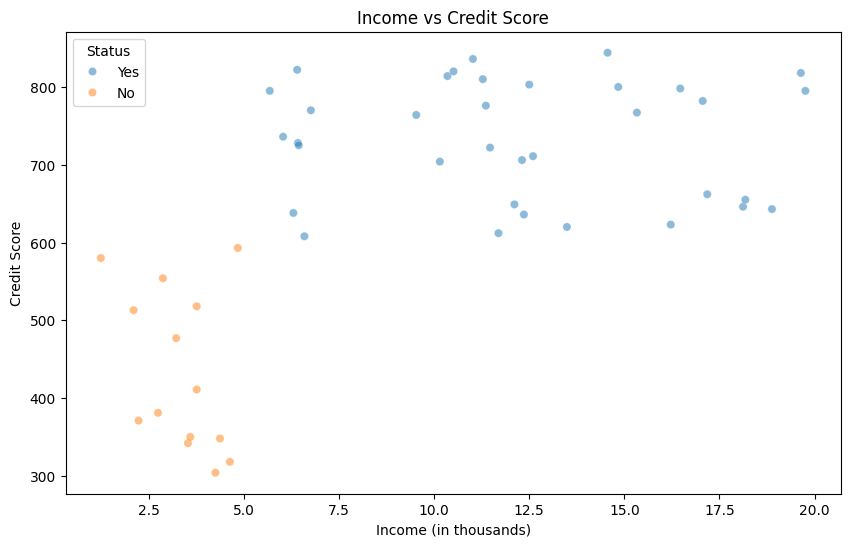

In [7]:
# lets plot income vs credit score
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='income', y='credit_score', hue='status', alpha=0.5)
plt.title('Income vs Credit Score')
plt.xlabel('Income (in thousands)')
plt.ylabel('Credit Score')
plt.legend(title='Status')
plt.show()

In [9]:
# new customer
new_customer_income = 7.5
new_customer_credit_score = 720

# lets compute the distance from new customer to all existing customers
df['distance'] = np.sqrt((df['income'] - new_customer_income)**2 + (df['credit_score'] - new_customer_credit_score)**2)

# sort by distance
df_sorted = df.sort_values(by='distance')
df_sorted.head(10)


,customer_id,income,status,credit_score,distance
14,15,11.47,Yes,722,4.445323
13,14,6.44,Yes,725,5.111125
1,2,6.42,Yes,728,8.072571
15,16,12.60,Yes,711,10.344564
17,18,12.31,Yes,706,14.803246
11,12,6.03,Yes,736,16.067386
38,39,10.15,Yes,704,16.217968
44,45,9.53,Yes,764,44.046804
41,42,15.33,Yes,767,47.647759
24,25,6.76,Yes,770,50.005476


In [13]:
# lets wrap this in a function
def distance_classifier(new_income, new_credit_score, data, k=5):
    data['distance'] = np.sqrt((data['income'] - new_income)**2 + (data['credit_score'] - new_credit_score)**2)
    data_sorted = data.sort_values(by='distance')
    top_k = data_sorted.head(k)
    prediction = top_k['status'].mode()[0]
    return prediction

prediction = distance_classifier(6, 340, df, k=5)
print(f'The predicted status for the new customer is: {prediction}')

The predicted status for the new customer is: No


Cosine similarity between product A and product B: 0.9949366763261821
Products are very similar.
Angle between product A and product B: 5.76818118618818 degrees


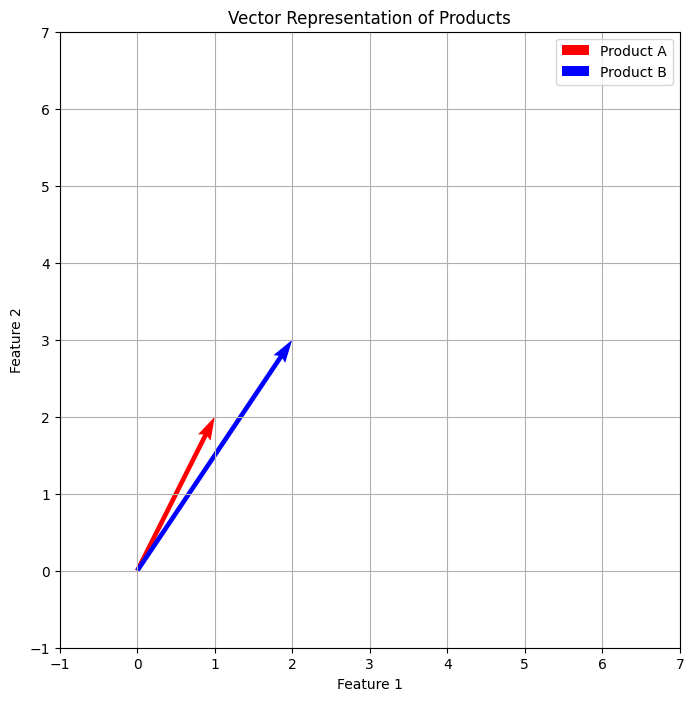

In [18]:
# cosine similarity
# two products
product_a = np.array([1, 2, 3, 4, 5])
product_b = np.array([2, 3, 4, 5, 6])

cosine_similarity = np.dot(product_a, product_b) / (np.linalg.norm(product_a) * np.linalg.norm(product_b))
print("Cosine similarity between product A and product B:", cosine_similarity)

if cosine_similarity > 0.95:
    print("Products are very similar.")
else:
    print("Products are not similar.")  


# lets co,mpute angle between above two products
cosine_angle = np.dot(product_a, product_b) / (np.linalg.norm(product_a) * np.linalg.norm(product_b))
angle_in_radians = np.arccos(cosine_angle)
angle_in_degrees = np.degrees(angle_in_radians)
print(f'Angle between product A and product B: {angle_in_degrees} degrees')

# plot it using matplotlib
plt.figure(figsize=(8, 8))
plt.quiver(0, 0, product_a[0], product_a[1], angles='xy', scale_units='xy', scale=1, color='r', label='Product A')
plt.quiver(0, 0, product_b[0], product_b[1], angles='xy', scale_units='xy', scale=1, color='b', label='Product B')
plt.xlim(-1, 7)
plt.ylim(-1, 7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Vector Representation of Products')
plt.grid()
plt.legend()
plt.show()


In [1]:
import pandas as pd
import numpy as np

# lets prepare data
data ={
    'customer_id': np.arange(1, 50),
    'income': np.random.uniform(1, 20, size=49),
    # if income < 5, then status is No else Yes
}

df = pd.DataFrame(data)
df.head()
df.income = df.income.round(2)
df['status'] = np.where(df.income < 5, 'No', 'Yes')
df['credit_score'] = np.where(df.status == 'Yes', np.random.randint(600, 850, size=df.shape[0]), np.random.randint(300, 599, size=df.shape[0]))


In [2]:
df.head(2)

,customer_id,income,status,credit_score
0,1,11.76,Yes,603
1,2,13.97,Yes,645


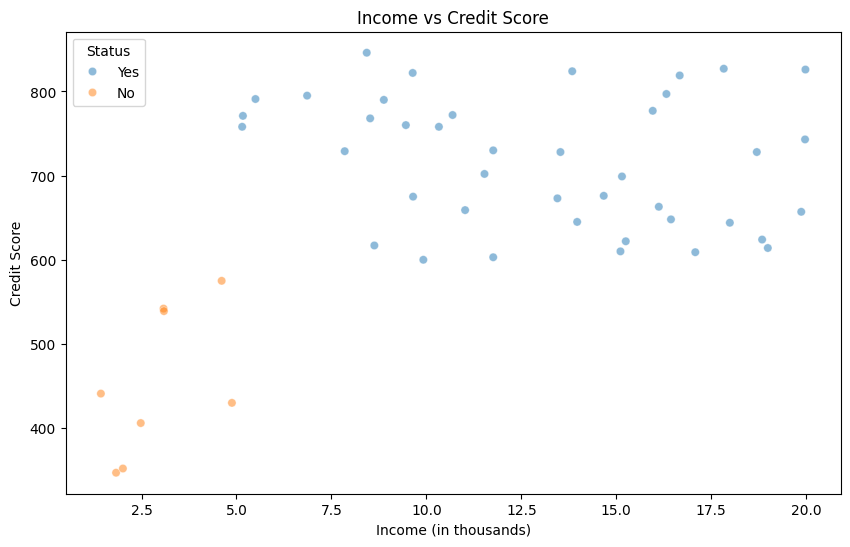

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='income', y='credit_score', hue='status', alpha=0.5)
plt.title('Income vs Credit Score')
plt.xlabel('Income (in thousands)')
plt.ylabel('Credit Score')
plt.legend(title='Status')
plt.show()

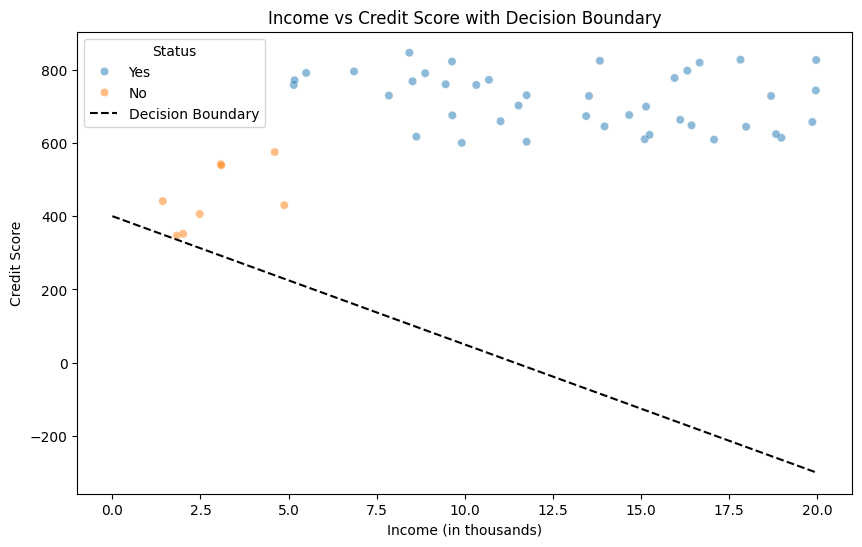

In [21]:
# lets try different value of w1 and w2 and w0
w0 = -400
w1 = 35
w2 = 1

# decision boundary line: w0 + w1*x1 + w2*x2 = 0
# rearranging: x2 = -(w0 + w1*x1)/w2
x1_values = np.linspace(0, 20, 100)
x2_values = -(w0 + w1 * x1_values) / w2 
# plot the decision boundary
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='income', y='credit_score', hue='status', alpha=0.5)
plt.plot(x1_values, x2_values, color='black', linestyle='--', label='Decision Boundary')
plt.title('Income vs Credit Score with Decision Boundary')
plt.xlabel('Income (in thousands)')
plt.ylabel('Credit Score')
plt.legend(title='Status')
plt.show()